# Solution to Exercise DFT 3
---

### Exercise 1

(a) Generate a signal f(t) (T=10) of the form
$$
f(t) = \begin{cases} 1 & t\in[0,3] \\ -1 & t\in (3,5] \\ 3 & t\in (5,7]\\  7 & t\in (7,10] \end{cases}
$$
and sample it with $f_s=100$. Use https://docs.scipy.org/doc/numpy/reference/generated/numpy.piecewise.html.

(b) Calculate the spectrum of the signal via FTT and plot it (|c_n| vs. f_n).

(c) Generate a  Gaussian filter (https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.signal.gaussian.html) and apply it to the spectrum.

(d) Perform an inverse FFT and plot both, the original and the modified signal in a common plot.

e) Optional: Create a python function plot\_signal(sigma) which performs the steps (a)-(d) from above for a given value of $\sigma$ (standard deviation of the gaussian filter). Use interact from ipywidgets (https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) to generate a GUI with a slider-bar for $\sigma$.

1000

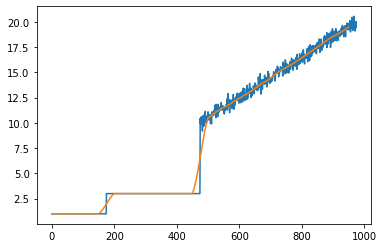

In [29]:
from scipy.signal import gaussian
t = np.linspace(0,10,1000)
f = np.piecewise(t,[t>0,t>2,t>5],[1,3,lambda t : 2*t+.4*np.random.randn(t.size)])
g = gaussian(50,20)
g = g/np.sum(g)

plt.plot(f[25:])
plt.plot(np.convolve(f,g,mode='valid'))
np.convolve(f,g,mode='valid').size
f.size

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift, ifftshift, fftfreq
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
import scipy.signal as scs

################
# Your code here
################
T, fs = 10, 100
N=fs*T
t, freq =np.linspace(0,10,N), np.arange(-fs/2,fs/2,1/T)
f = np.piecewise(t,[t>0, t>3, t>5 ,t>7],[1,-1,3,7])

plt.figure(figsize=(15,4))

def plot_signal(s):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(t,f,'r')
    plt.title('Signal')
    plt.grid()

    #Fiter Spectrum with gaussian
    plt.subplot(1,2,2)
    c=fftshift(fft(f))
    plt.plot(freq,np.abs(c))
    c_f = c*scs.gaussian(freq.size,s)
    plt.plot(freq,np.abs(c_f))
    plt.axis([-50,50,0,100])
    f_f = ifft(ifftshift(c_f))
    plt.subplot(1,2,1)
    plt.plot(t,f_f,'g')
    plt.grid()
    
interact(plot_signal,s=widgets.IntSlider(min=1, max=50, step=1, value=10))

<Figure size 1080x288 with 0 Axes>

interactive(children=(IntSlider(value=10, description='s', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.plot_signal(s)>

### Exercise 2

In this exercise you will learn a simplified version of jpg image-compression using the two-dimensional FFT.
To do this, read the ($n\times n$ pixel) picture Lena.png into python.

(a) Perform a 2D FFT and plot the spectrum $|c_{n,m}|$ (symmetric w.r.t. $f_{n,m}= 0$, use a logarithmic scale).

(b) Perform a low-pass filtering in the frequency spectrum, i.e. cut out high frequencies (again symmetrically w.r.t. $f_{n,m}= 0$).

(c) Transform the low-pass filtered spectrum back and plot both images (the filtered and non-filtered image) side by side. 

(d) Calculate the compression rate.

(e) Optional: Create a python function plot\_jpeg(f\_cut) which performs the steps (a)-(d) from above for a given cutoff f\_cut. Use interact from ipywidgets (https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) to generate a GUI with a slider-bar for $f\_cut$.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift, fftfreq
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

def plot_jpeg(f_cut):
    
    plt.figure(figsize=(15,4))
    A = plt.imread('Lena.png')
    plt.subplot(1, 3, 1)
    plt.imshow(A,cmap='gray')
    
    c = fftshift(fft2(A))
    fx,fy = np.meshgrid(np.arange(-256,256,1),np.arange(-256,256,1))
    
    a_row,a_col = A.shape
    lowpass = np.zeros((a_row,a_col))
    c_row, c_col = np.int(a_row/2), np.int(a_col/2)

    lowpass[c_row-f_cut:c_row+f_cut, c_col-f_cut:c_col+f_cut] = 1
    
    A_f = ifft2(ifftshift(c*lowpass))

    plt.subplot(1,3,2)
    plt.imshow(abs(A_f),cmap='gray')

    plt.subplot(1,3,3)
    plt.contourf(fx,fy,np.log(np.abs(c*lowpass)))
    #plt.contourf(fx,fy,np.abs(c*lowpass))
    plt.grid()
    plt.colorbar()
    
    compression_rate= np.round(((2*f_cut)**2)/(512.0**2)*100)
    print('compression_rate: {} %'.format(compression_rate))

interact(plot_jpeg,f_cut=widgets.IntSlider(min=0, max=255, step=1, value=250))

interactive(children=(IntSlider(value=250, description='f_cut', max=255), Output()), _dom_classes=('widget-int…

<function __main__.plot_jpeg(f_cut)>

### Exercise 3

Read in the file sound.dat. It contains 2 seconds of a song recorded with $f_s=10$kHz.

(a) Manually create a spectogram with a non-overlapping time window of $50$ms.

(b) Compare your spectogram with that of python.



20000
40


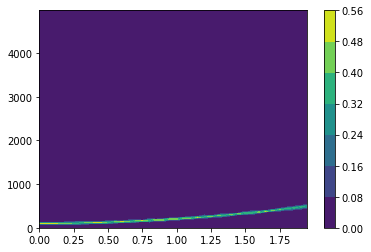

(250, 40)

In [14]:
import numpy as np
import scipy.signal as sps
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

################
# Your code here
################
F = np.loadtxt(open("sound.dat"))
print(F.size)
T,f_s, time_w = 2, 10000, 0.05 # Time, sampling rate, time duration for one short time segment
N = f_s*T #=F.shape  # Number of total samples
Ns = np.int(T/time_w) # Number of short time segments
print(Ns)
Size_S = np.int(time_w*f_s) # Number of samples within one short time element
freq,t = np.arange(0,f_s/2,1/time_w), np.arange(0,T,time_w) # Only half of frequency axes needed

Segment = np.array_split(F,Ns)

for i in range(Ns):
    Segment[i]= np.abs(1/Size_S*fftshift(fft(Segment[i])))[np.int(Size_S/2):]

Segment = np.asarray(np.transpose(Segment))

plt.contourf(t,freq,Segment)
plt.colorbar()
plt.show()
Segment.shape

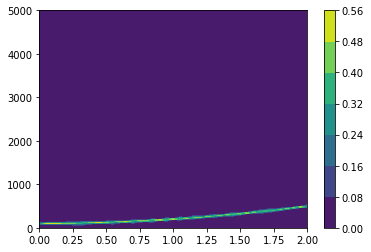

In [15]:
freq,t,s = sps.stft(F,f_s,nperseg=0.05*10000,noverlap=0,window='boxcar')
plt.contourf(t,freq,np.abs(s))
plt.colorbar()